In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
mydata=pd.read_csv('/content/50_Startups.csv')

In [3]:
mydata.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


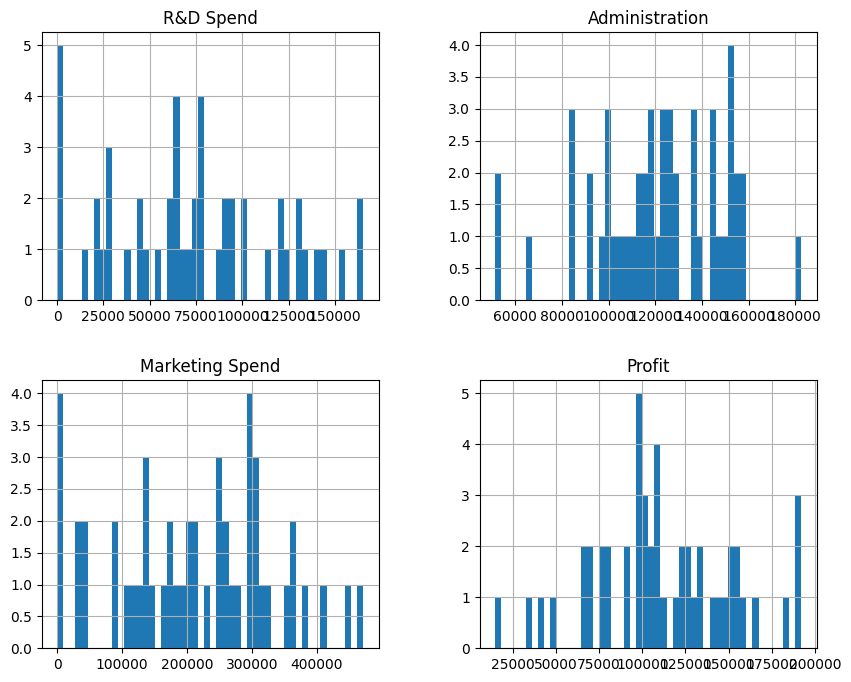

In [4]:
mydata.hist(bins=50,figsize=(10,8))
plt.show()

<Axes: xlabel='R&D Spend', ylabel='Administration'>

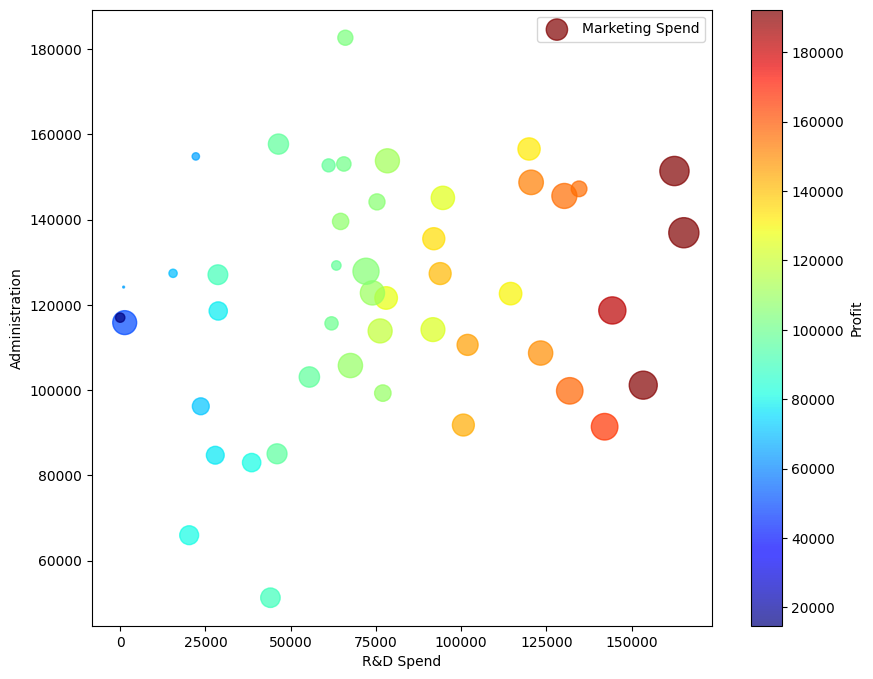

In [6]:
mydata.plot(kind="scatter",x="R&D Spend",y="Administration",c="Profit",cmap="jet",colorbar=True,legend=True,sharex=False,figsize=(10,8),s=mydata['Marketing Spend']/1000,label="Marketing Spend",alpha=0.7)

In [7]:
mydata.isna().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [8]:
mydata.dtypes

,0
R&D Spend,float64
Administration,float64
Marketing Spend,float64
State,object
Profit,float64


In [9]:
x = mydata[["R&D Spend"]]
y = mydata["Profit"]

In [10]:
x=mydata[["R&D Spend"]]
y=mydata["Profit"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
lr = LinearRegression()

In [12]:
lr.fit(X_train.values,y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [14]:
r2_score( y_test, y_pred)

0.9265108109341951

In [15]:
#checking the prediction
lr.predict(x[0:1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829])

In [16]:
print(lr.intercept_)

49336.6680379911


In [17]:
type(lr)

sklearn.linear_model._base.LinearRegression

In [21]:
import pickle


In [22]:
with open('model.pkl','wb') as f:
    pickle.dump(lr,f)

In [23]:
with open('model.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [24]:
x[0:5] # Change X to x, as 'x' is the variable holding your feature data.

,R&D Spend
0,165349.20
1,162597.70
2,153441.51
3,144372.41
4,142107.34


In [25]:
clf2.predict(x[0:5])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([190480.25107829, 188131.54561896, 180315.73844483, 172574.27208786,
       170640.7877067 ])

In [26]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

       Actual      Predicted
13  134307.35  127862.209964
39   81005.76   82250.563346
30   99937.59  102255.720782
45   64926.08   50190.473476
17  125370.37  130136.881905


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
from sklearn.preprocessing import StandardScaler #For feature scaling


In [30]:
x=mydata.drop(columns=['Profit'])
y=mydata['Profit']

In [31]:
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (50, 4)
Shape of y: (50,)


In [32]:
x=x.values
y=y.values

In [33]:
# 1. Feature Engineering and Selection
mydata['rd_marketing_interaction'] = mydata['R&D Spend'] * mydata['Marketing Spend']
# Handle potential 0 values with np.log1p if necessary
mydata['log_rd_spend'] = np.log1p(mydata['R&D Spend'])
# Handle potential 0 values with np.log1p if necessary
mydata['log_marketing_spend'] = np.log1p(mydata['Marketing Spend'])

# Check if 'State' column exists before applying get_dummies
if 'State' in mydata.columns:
    mydata = pd.get_dummies(mydata, columns=['State'], drop_first=True)

# Select features for the model (either all 8 or a subset of 6)
# For all 8 features:
x = mydata.drop(columns=['Profit'])
y = mydata['Profit']

# 2. Data Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Feature Scaling (Optional but recommended)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 4. Model Training
model_multiple = LinearRegression()
model_multiple.fit(x_train, y_train)  # Changed X_train to x_train

# 5. Prediction and MSE Calculation
y_pred = model_multiple.predict(x_test)  # Predict on the test set
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse:.4f}")


Multiple Linear Regression
  Mean Squared Error: 205835843.8831


In [34]:
# 1. Feature Engineering and Selection
mydata['rd_marketing_interaction'] = mydata['R&D Spend'] * mydata['Marketing Spend']
# Handle potential 0 values with np.log1p if necessary
mydata['log_rd_spend'] = np.log1p(mydata['R&D Spend'])
# Handle potential 0 values with np.log1p if necessary
mydata['log_marketing_spend'] = np.log1p(mydata['Marketing Spend'])

# Check if 'State' column exists before applying get_dummies
if 'State' in mydata.columns:
    mydata = pd.get_dummies(mydata, columns=['State'], drop_first=True)

# Select features for the model (either all 8 or a subset of 6)
# For all 8 features:
x = mydata.drop(columns=['Profit'])
y = mydata['Profit']

# 2. Data Splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Feature Scaling (Optional but recommended)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 4. Model Training
model_multiple = LinearRegression()
model_multiple.fit(x_train, y_train)  # Changed X_train to x_train

# 5. Prediction and MSE Calculation
y_pred = model_multiple.predict(x_test)  # Predict on the test set
mse = mean_squared_error(y_test, y_pred)  # Calculate MSE

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse:.4f}")


Multiple Linear Regression
  Mean Squared Error: 205835843.8831


In [ ]:
print("Shape of x:",x_train.shape)
print("Shape of y:",y_train.shape)

In [36]:
# Assuming 'State' was already processed and columns like 'State_California', 'State_Florida' etc. exist
# If not and 'State' exists in your original data, skip this step and move to the next one

# Get a list of columns that start with 'State_'
state_columns = [col for col in mydata.columns if col.startswith('State_')]

# Use these columns for dummy encoding if they exist
if state_columns:
  mydata = pd.get_dummies(mydata, columns=state_columns, drop_first=True)
else:
  # If 'State' column still exists and wasn't processed before, use this
  mydata = pd.get_dummies(mydata, columns=['State'], drop_first=True)

In [37]:
# S eparate features (x) and target(y)
x=mydata.drop(columns=['Profit'])
y=mydata['Profit']

#======================================
# Multiple Linear Regression
# =======================================
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(x_train, y_train)

y_pred_multiple = model_multiple.predict(x_test)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")


Multiple Linear Regression
  Mean Squared Error: 205835843.8831
  R² Score: 0.7458


In [38]:
print(model_multiple.intercept_)

115651.7205


In [39]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [41]:
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

       Actual      Predicted
13  134307.35  127537.681704
39   81005.76   89637.760910
30   99937.59  103290.625994
45   64926.08   52492.691362
17  125370.37  126845.597128
